# Chapter 1: Filters

Ildar Rakhmatulin ildarr2016@gmail.com

## Import libraries 

To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

## Load dataset

https://github.com/Ildaron/ironbci  
The following dataset structure is used  


ch1	ch2	ch3	ch4	ch5	ch6	ch7	ch8  
..    ..    ..  ..  ..  ..  ..  ..    
..    ..    ..  ..  ..  ..  ..  ..  

          ch1     ch2      ch3      ch4      ch5     ch6      ch7      ch8
0     23899.1  2951.1  36442.2  38418.6  12414.9  3759.5  31001.4  52775.3
1     23917.7  3048.0  36463.8  38344.3  12448.1  3726.3  31032.4  52223.4
2     23984.9  3148.2  36525.1  39002.6  12520.4  3601.3  31103.2  53175.1
3     24016.8  3183.3  36551.5  39602.8  12548.5  3473.0  31133.2  54514.6
4     23960.3  3061.0  36494.8  39256.9  12475.6  3549.7  31061.9  54321.3
...       ...     ...      ...      ...      ...     ...      ...      ...
7115  23896.6  3893.1  37567.5  38276.6  11183.1  4515.5  31611.9  48532.8
7116  23850.2  3780.5  37514.3  38075.4  11119.7  4572.2  31551.9  48566.2
7117  23766.2  3644.2  37432.3  37477.1  11029.8  4755.0  31464.2  47165.5
7118  23768.4  3709.8  37443.6  37362.9  11048.4  4738.0  31481.5  46410.0
7119  23841.3  3830.5  37514.9  37800.0  11130.5  4623.2  31560.6  47139.6

[7120 rows x 8 columns]


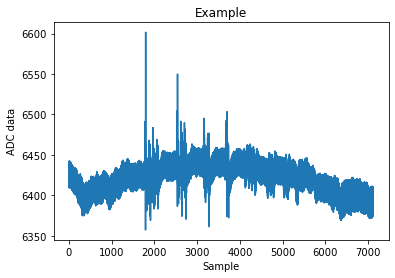

In [2]:
#len_data = 1169
#value_data = 27

dataset_y_row = pd.read_excel("https://github.com/rklymentiev/EEG_course/raw/master/dataset/dataset.xlsx")
print(dataset_y_row)
dataset_y = dataset_y_row.transpose()

dataset_one_ch = dataset_y.iloc[0]
dataset_one_ch = round(1000000*4.5*(dataset_one_ch/16777215),2)

plt.plot(dataset_one_ch)
plt.title("Example")
plt.ylabel('ADC data')
plt.xlabel('Sample')
plt.show()

## Signal proccessing

Signal processing for EEG (Electroencephalography) data involves a range of techniques used to analyze and extract meaningful information from the electrical signals recorded from the brain. EEG signals are complex and often contaminated with noise, artifacts, and other unwanted components. Signal processing methods are essential for enhancing the signal quality, identifying patterns, and understanding brain activity.

## Band Pass Filter

Band-pass filtering is a common signal processing technique used in EEG (Electroencephalography) data analysis to isolate specific frequency bands of interest while removing unwanted frequencies. Band-pass filtering allows researchers to focus on particular brainwave rhythms that are relevant to their study. For example, you might want to extract the alpha, beta, or gamma waves from the EEG data.  


**Positive**  
*   Frequency Analysis: EEG signals exhibit various frequency components (e.g., alpha, beta, delta, theta waves), each associated with different cognitive processes. A band-pass filter isolates these components, aiding frequency-specific analysis.

* Event-Related Potentials (ERPs): When studying ERPs or specific neural responses to stimuli, a band-pass filter can highlight the frequency ranges relevant to the event.

* Artifact Removal: Band-pass filters can reduce certain types of artifacts, such as low-frequency drifts or high-frequency noise, by focusing on the desired frequency range.

* Functional Connectivity: Applying consistent band-pass filtering across channels can help enhance functional connectivity analysis by removing frequencies unrelated to the neural network under investigation.

* Removing Baseline Drift: For EEG recordings, slow baseline drifts can obscure meaningful activity. Band-pass filters with cutoffs around the drift frequency can help minimize this effect.

**Negative**

*  While band-pass filters can be valuable for EEG data analysis, they can also be problematic when used inappropriately or excessively. Here are some scenarios where a band-pass filter might not be suitable for EEG processing:

* Overfiltering. Applying overly narrow band-pass filters can lead to signal distortion and the removal of genuine neural activity. Aggressive filtering might result in the loss of important frequency components.

* Misaligned Cutoff Frequencies. Setting incorrect low-pass and high-pass cutoff frequencies can result in unintended filtering of important neural oscillations or event-related potentials.

* Baseline Drift Removal. Relying solely on a band-pass filter to remove baseline drift can inadvertently remove relevant low-frequency neural signals along with the drift.

* Lack of Understanding. If you lack a clear understanding of the frequency characteristics of EEG signals and the implications of filtering, you might misuse band-pass filters and draw incorrect conclusions from your analysis.

* Data Artifacts. Band-pass filtering might not effectively remove certain types of artifacts, such as muscle artifacts or eye blinks, requiring additional preprocessing steps.

* Uneven Spectral Distribution. EEG signals often have uneven spectral distributions, and applying a uniform band-pass filter might not accurately capture the underlying neural activity.

* Inconsistent Filtering. If you apply different band-pass filters to different data segments or channels without justification, it can lead to inconsistencies in your analysis.

**How it works**   
A band-pass filter for EEG works by selectively allowing a specific range of frequencies within the EEG signal to pass through while diminishing frequencies outside that range. This is achieved through a filter design that boosts the desired frequencies and reduces amplitudes of unwanted frequencies, helping highlight neural activity in the chosen frequency band for focused analysis.

Here we use **Butterworth filters** via Signal library.   
signal.butter is a function provided by the scipy.signal module in Python. It is used to design digital Butterworth filters, which are a type of infinite impulse response (IIR) filter commonly used for signal processing tasks, including filtering EEG signals. The Butterworth filter is characterized by having a flat frequency response in its passband and a gradual roll-off in its stopband.  

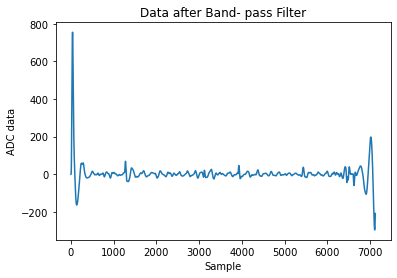

In [3]:
data_after_band_pass_filter = dataset_y

def butter_highpass(cutoff, fs, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff_high, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

fps = 250
cutoff_high=1
cutoff_low=5
x=[]
for a in range(0,8,1):
    filtered_sine_high = butter_highpass_filter(dataset_y.iloc[a], cutoff_high, fps)
    filtered_high_pass= butter_lowpass_filter(filtered_sine_high, cutoff_low, fps)
    data_after_band_pass_filter.iloc[a] = filtered_high_pass
    test = filtered_high_pass

plt.plot(filtered_high_pass)
plt.title("Data after Band- pass Filter")
plt.ylabel('ADC data')
plt.xlabel('Sample')
plt.show()

## Average filter

In signal processing of EEG (Electroencephalography) data, calculating the average is a common technique used to improve the signal-to-noise ratio and highlight underlying brain activity. The EEG signal is often contaminated with noise and artifacts, and averaging can help reduce these unwanted components while preserving the brain-related activity.   

**Positive**  

*   An average filter can effectively smooth out the EEG signal by removing high-frequency noise and minor fluctuations.
*   Easy to implement
*   EEG signals often exhibit slow oscillatory patterns, such as alpha, beta, and delta waves. Applying an average filter with a longer time window can help visualize these slower frequency components by attenuating faster fluctuations

**Negative**

*   Temporal Resolution. Applying an average filter with a large window can smooth out fine temporal details and fast changes in the EEG signal. Depending on your analysis goals, this may or may not be desirable.

*   Signal Distortion. Over-smoothing can lead to the loss of important signal features, including transient responses or rapid changes that might be critical for your analysis.

*   Baseline Fluctuations. If analysis involves comparing EEG activity before and after specific events, excessive smoothing can reduce the detectable differences in baseline fluctuations.

**How it works**  

An average filter for EEG works by smoothing out the signal by replacing each data point with the average value of neighboring data points within a defined window. Need to choose an appropriate window size to balance noise reduction with preserving important signal features.



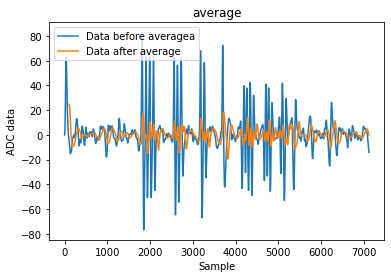

In [4]:
def average (data,dara_before, average_lenght):
    data = pd.DataFrame(data)
    average=data.rolling(window=average_lenght).mean()

    plt.title("average")
    plt.plot(dara_before)
    plt.plot(average)
    plt.ylabel('ADC data')
    plt.xlabel('Sample')
    plt.legend(['Data before averagea','Data after average'], loc='upper left')
    plt.show()

average_lenght = 100
average(data_after_band_pass_filter.iloc[0], data_after_band_pass_filter.iloc[0], average_lenght)

## Gaussian Filter

Applying a Gaussian filter to EEG (Electroencephalography) data is a signal processing technique commonly used for smoothing or denoising the signals. Gaussian filtering is a linear smoothing filter that uses a Gaussian kernel to convolve with the EEG signal, effectively reducing noise and emphasizing underlying trends or features.  

**Positive**  

*   Noise Smoothing. Gaussian filters smooth out noise in the EEG signal, helping to reduce random fluctuations caused by artifacts and environmental interference.

*  Preserving Temporal Details. Unlike simple moving average filters, Gaussian filters preserve finer temporal features by attenuating noise while maintaining sharp signal transitions.

*  Event-Related Potentials (ERPs). Gaussian filters are well-suited for enhancing ERP components, such as P300 responses, by reducing noise without distorting the underlying event-related activity.

*  Spatial Smoothing. For EEG recordings with multiple electrodes (scalp channels), Gaussian filters can be applied across neighboring channels to improve signal-to-noise ratio and reveal broader neural patterns.

*  Frequency-Selective Smoothing. By adjusting the width of the Gaussian kernel, is ir possibly selectively smooths specific frequency ranges in the EEG signal, making it useful for targeting noise reduction in certain frequency bands.

**Negative**

*   Kernel Size. The width of the Gaussian kernel (often determined by the standard deviation) impacts the amount of smoothing. Smaller standard deviations preserve more detail, while larger values provide more smoothing.

* Signal Distortion. Excessive smoothing can blur rapid changes and transient responses, potentially masking important features in the EEG data.

* Artifact Handling. While Gaussian filters can reduce random noise, they might not be as effective at removing structured artifacts like muscle artifacts. Additional preprocessing steps might be needed.

* Parameter Selection. The choice of kernel size (standard deviation) depends on your specific analysis goals and the characteristics of your EEG data. Experimentation and validation are crucial.

**How it works**    

A Gaussian filter for EEG works by convolving the EEG signal with a Gaussian-shaped curve. This curve assigns more weight to nearby data points and gradually decreases the weight as distance from the center increases.  The width of the Gaussian curve, controlled by its standard deviation, determines the level of smoothing: smaller standard deviations maintain fine details, while larger values yield more smoothing. This makes Gaussian filters suitable for enhancing event-related potentials and reducing noise while retaining temporal precision.

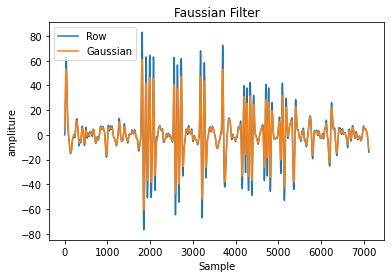

In [5]:
from scipy.ndimage import gaussian_filter1d

def gaussian (data1):
    gaussian = gaussian_filter1d(data1, 10)
    plt.title("Faussian Filter")
    plt.xlabel("Sample")
    plt.ylabel("ampliture")
    plt.plot(data1)
    plt.plot(gaussian[:10000],label='Second Line')
    plt.legend(["Row","Gaussian"], loc='upper left')
    plt.show()

gaussian(data_after_band_pass_filter.iloc[0])

## Median filter

Using the median filter for EEG (Electroencephalography) data is another signal processing technique that can be useful for denoising and removing outliers. The median filter replaces each data point with the median value within its neighboring window, which is effective in reducing random noise while preserving sharp edges or features in the signal.  

**Positive**  

*   Artifact Removal: Median filters are effective at removing transient artifacts like spikes and sharp fluctuations caused by muscle activity or electrode movement. They're particularly adept at preserving the integrity of the original signal during artifact removal.

* Impulsive Noise: EEG recordings can be affected by impulsive noise that causes isolated extreme values. Median filters are excellent at suppressing these isolated outliers without altering the rest of the signal.

* Preserving Features: Unlike some smoothing filters, median filters do not excessively blur or distort sharp features such as event-related potentials (ERPs) or transient neural responses.

*  Baseline Correction: Median filters can be used for baseline correction, especially in cases where the baseline exhibits sudden variations.

**Negative**


*   Smoothing: Median filters are not well-suited for smoothing continuous, gradual changes in EEG signals. They are designed to remove isolated outliers and sharp transients, so they may not effectively address slowly varying noise or baseline drift.

* Frequency-Specific Analysis: Median filters are not frequency-selective like band-pass filters. If you are specifically interested in analyzing frequency components of the EEG signal, using a median filter could distort these components.

* Event-Related Potentials (ERPs): While median filters can preserve sharp features, they might not be suitable for enhancing ERPs, as ERPs often require specialized preprocessing methods that maintain the temporal integrity of the responses.

* Signal Distortion: Median filters can cause signal distortion, especially if the filter's window size is too large. This distortion can impact the shape and timing of certain EEG components.

* Edge Effects: Median filters can introduce artifacts at the edges of the data, affecting the beginning and end of the filtered signal. Proper handling of these edge effects is essential.

* Baseline Drift: Median filters might not effectively remove slow baseline drifts, which require different techniques such as polynomial fitting or high-pass filtering.

* Non-Impulsive Noise: Median filters are most effective against impulsive noise. If the noise in your EEG signal is not primarily impulsive, other filtering methods might be more appropriate.

**How it works**  

A median filter for EEG works by replacing each data point in the signal with the median value of neighboring data points within a defined window. This process effectively reduces isolated spikes, impulsive noise, and sharp transients in the signal while preserving the integrity of sharp features.

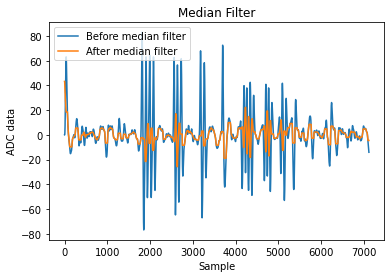

In [8]:
from scipy.ndimage import median_filter


def f_median_filter(data1,data2):
    result = median_filter(data1, size=100)

    plt.plot(data2)
    plt.plot(result)
    plt.title("Median Filter")
    plt.ylabel('ADC data')
    plt.xlabel('Sample')
    plt.legend(['Before median filter', 'After median filter'], loc='upper left')
    plt.show()

f_median_filter(data_after_band_pass_filter.iloc[0], data_after_band_pass_filter.iloc[0])
